In [12]:
import numpy as np
import matplotlib.pyplot as plt
import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical


In [3]:
X = np.load("../data/processed/chest_X.npy")
y = np.load("../data/processed/chest_y.npy")

In [4]:
print("X shape:", X.shape)  # (num_samples, timesteps, num_features)
print("y shape:", y.shape)  # (num_samples,)

X shape: (171, 42000, 8)
y shape: (171,)


In [5]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_cat = to_categorical(y_encoded)

# Store for later evaluation
class_names = label_encoder.classes_

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_cat, test_size=0.2, random_state=42, stratify=y_encoded
)

In [7]:
model = Sequential([
    Conv1D(64, kernel_size=5, activation='relu', input_shape=X.shape[1:]),
    MaxPooling1D(pool_size=2),
    Conv1D(128, kernel_size=5, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(y_cat.shape[1], activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

c:\Users\Joseph\generative-health-models\.venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 41996, 64)      │         2,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 20998, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 20994, 128)     │        41,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 10497, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1343616)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1343616)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │    85,991,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 86,035,460 (328.20 MB)

 Trainable params: 86,035,460 (328.20 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_test, y_test)
)

Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.4768 - loss: 144.6716 - val_accuracy: 0.8571 - val_loss: 1.6020
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.8636 - loss: 1.1557 - val_accuracy: 0.8000 - val_loss: 1.4833
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 15s 3s/step - accuracy: 0.8023 - loss: 0.7773 - val_accuracy: 0.8000 - val_loss: 0.5905
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 27s 5s/step - accuracy: 0.8701 - loss: 0.3691 - val_accuracy: 0.8286 - val_loss: 0.3291
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 22s 4s/step - accuracy: 0.9636 - loss: 0.2589 - val_accuracy: 0.8000 - val_loss: 1.0630
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.9514 - loss: 0.2539 - val_accuracy: 0.8286 - val_loss: 1.2624
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.9919 - loss: 0.1253 - val_accuracy: 0.8571 - val_loss: 1.3773
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 1.0000 - loss: 0.0854 - val_accuracy: 0.8571 - val_loss: 1.4431
Epoch 9/20


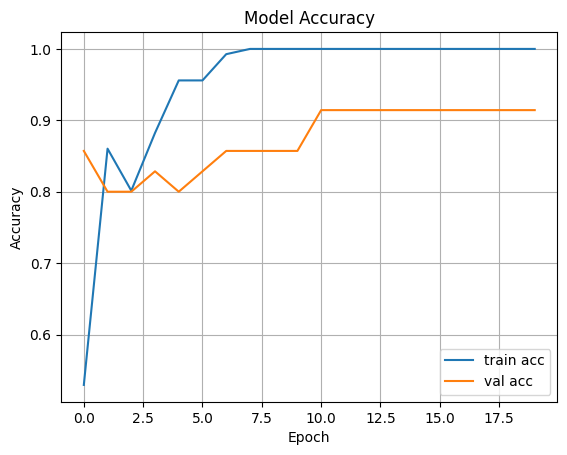

In [9]:
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [11]:
# Save model to disk
model.save("../models/timegan/chest_cnn_baseline_model.h5")

# Save label encoder for decoding predictions later
joblib.dump(label_encoder, "../models/timegan/chest_label_encoder.pkl")

print("✅ Model and label encoder saved.")

✅ Model and label encoder saved.


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


c:\Users\Joseph\generative-health-models\.venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


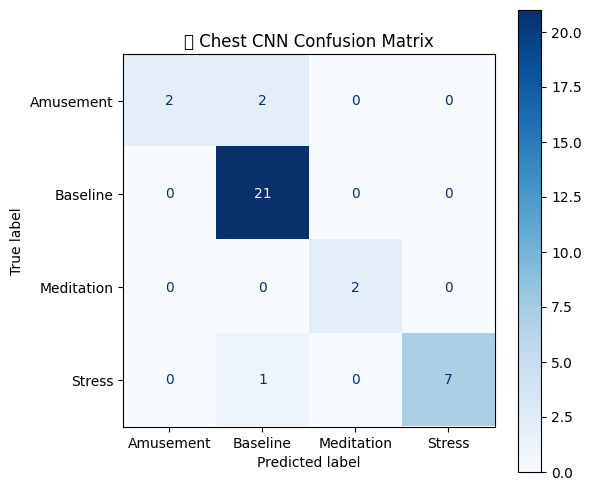

In [13]:
# Predict classes
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

# Plot
fig, ax = plt.subplots(figsize=(6, 6))
disp.plot(cmap='Blues', ax=ax, values_format='d')
plt.title("🧠 Chest CNN Confusion Matrix")
plt.show()

In [14]:
np.save("../outputs/timegan/chest_y_true.npy", y_true)
np.save("../outputs/timegan/chest_y_pred.npy", y_pred)